# Importing Libraries 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [85]:
df = pd.read_csv("/kaggle/input/churn-for-bank-customers/churn.csv")

In [86]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [88]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [89]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [90]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [91]:
# Some columns here isn't useful so we will drop them 
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [92]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Columns: ['Geography', 'Gender']


In [93]:
# convert all of the categorical data to numbers
# For the gender we will map it to 0 & 1 , so Femals : 0 , Males : 1

df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})

In [94]:
# For the Geography we will use the one hot encoding technique
df = pd.get_dummies(df, columns=["Geography"])

In [95]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6874,798,1,28,3,0.00,2,1,0,2305.27,0,True,False,False
3547,662,0,35,6,0.00,2,0,0,2423.90,1,False,False,True
5735,585,0,44,4,0.00,2,0,1,101728.46,0,False,False,True
2324,681,0,29,2,148143.84,1,1,1,52021.39,0,True,False,False
4178,510,0,32,1,0.00,2,0,1,28515.17,0,True,False,False


# Exploratory Data Analysis

In [96]:
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


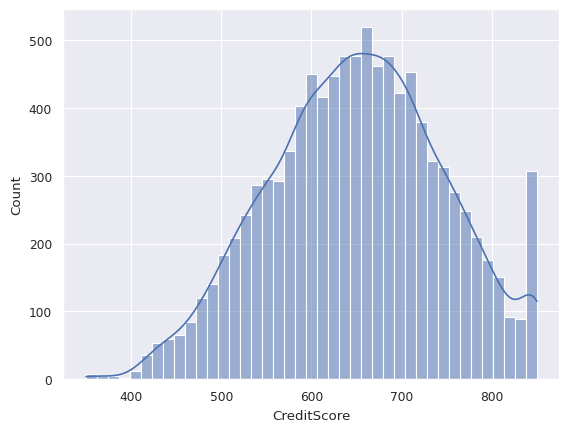

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


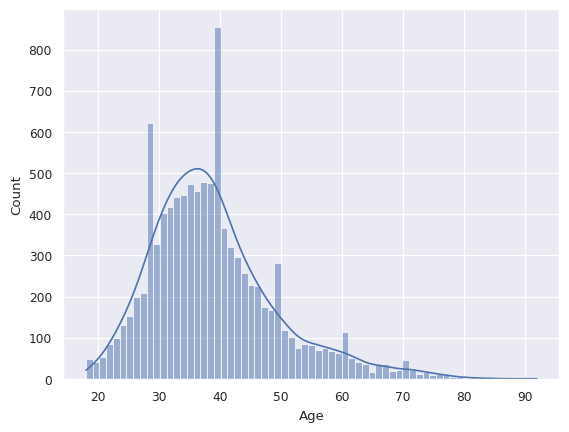

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


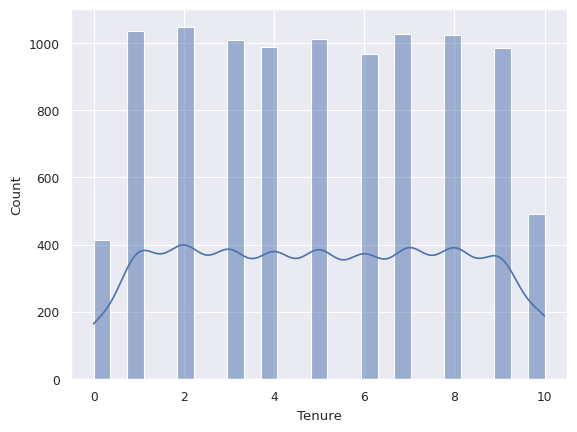

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


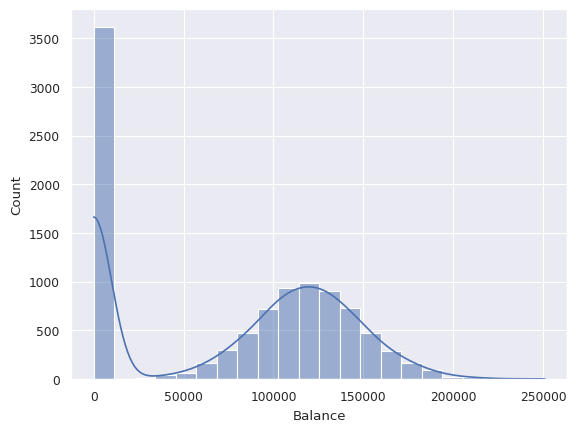

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


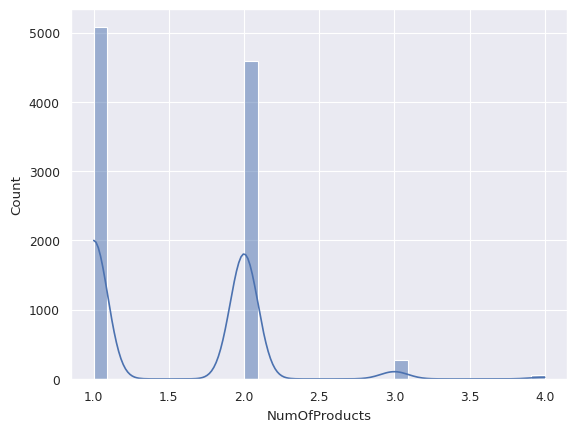

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


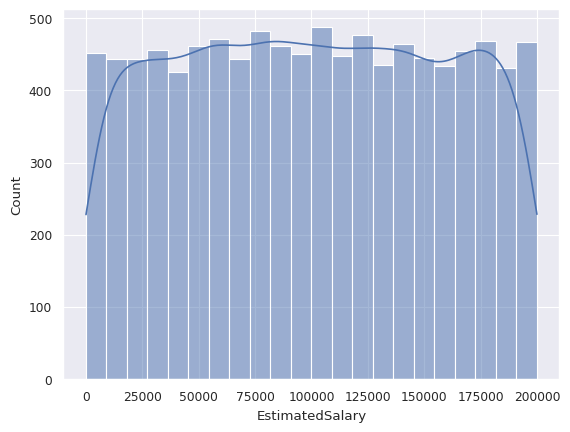

In [97]:
histplot_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in histplot_cols:
    sns.histplot(df[col], kde=True) 
    plt.show()


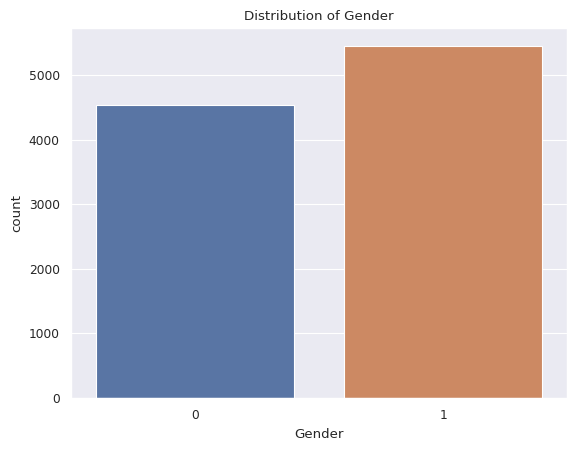

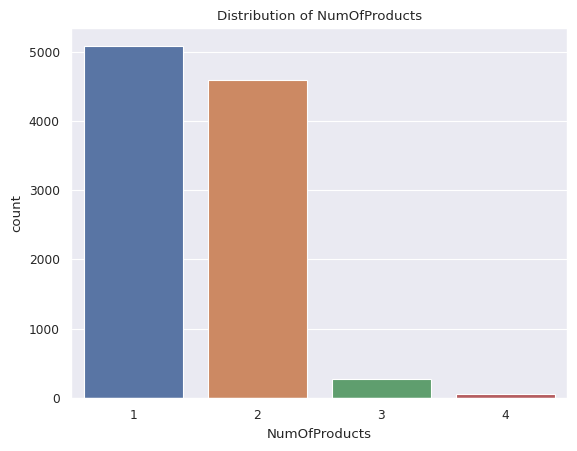

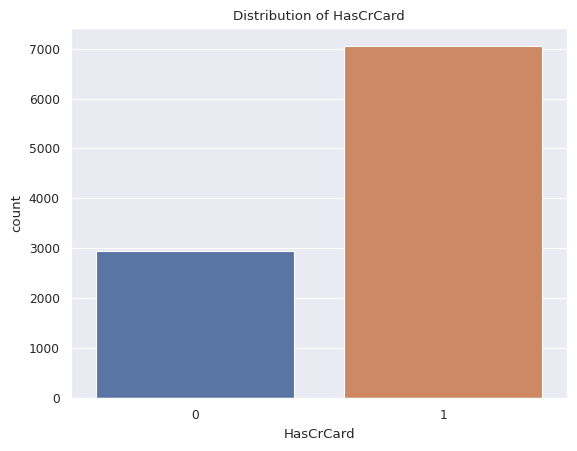

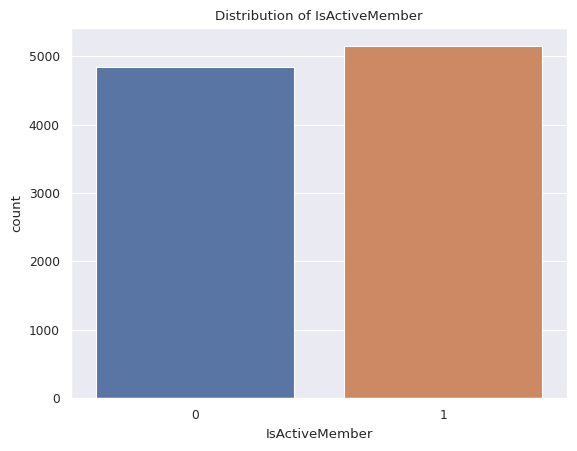

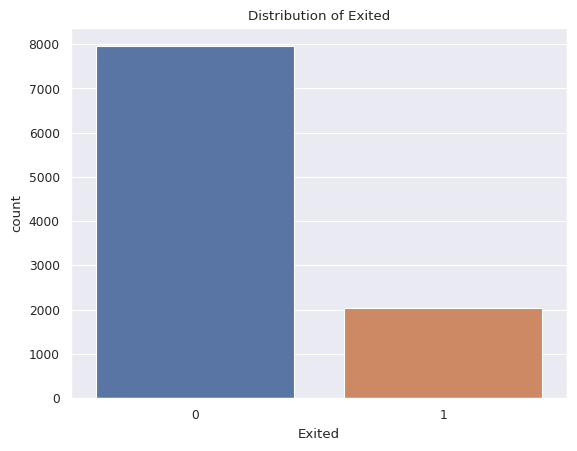

In [98]:
barplot_cols = [ 'Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']
for col in barplot_cols:
    sns.countplot(x=df[col])  
    plt.title(f'Distribution of {col}')
    plt.show()


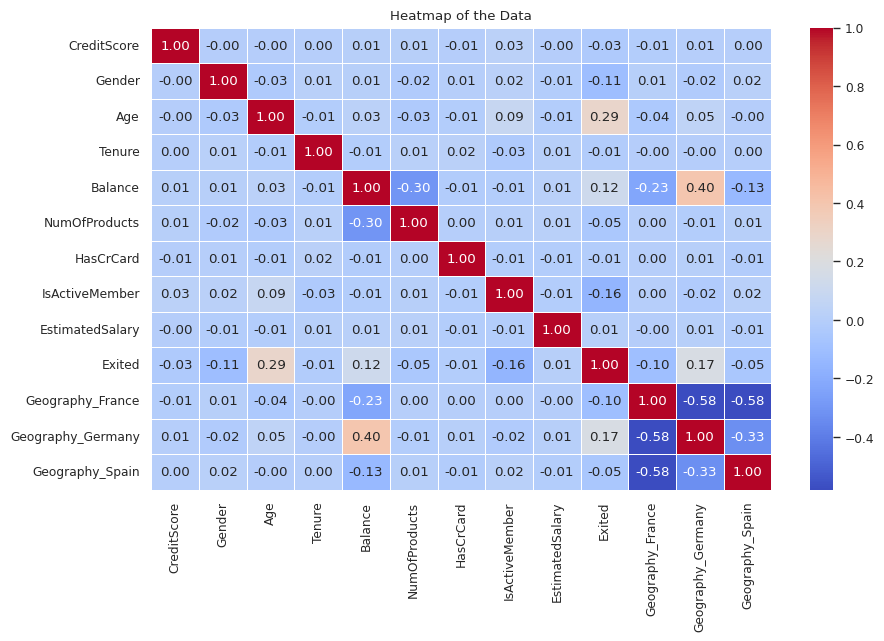

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of the Data')
plt.show()


# Data Pre-processing 

In [100]:
df['Age_Groups'] = pd.qcut(df['Age'], 6, labels = [1, 2, 3, 4, 5, 6])

In [101]:
df['Customer_Lifetime_Percentage'] = (df['Tenure'] / df['Age']) * 100

In [102]:
df["CreditsScore_Groups"] = pd.qcut(df['CreditScore'], 8, labels = [1, 2, 3, 4, 5, 6,7,8])

In [103]:
df["Balance_score_groups"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["EstSalaryScore_groups"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [104]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_Groups,Customer_Lifetime_Percentage,CreditsScore_Groups,Balance_score_groups,EstSalaryScore_groups
5483,568,1,28,1,127289.28,1,0,0,45611.51,0,False,False,True,1,3.571429,2,4,3
3927,580,0,65,1,0.00,2,0,1,103182.46,0,False,False,True,6,1.538462,2,1,6
5005,733,1,48,5,0.00,1,0,1,117830.57,0,True,False,False,5,10.416667,7,1,6
3409,598,0,46,7,131769.04,1,0,0,184980.23,1,False,True,False,5,15.217391,3,4,10
3988,644,0,32,8,141528.88,1,1,1,167087.34,1,False,True,False,2,25.000000,4,5,9
1500,630,1,50,1,81947.76,1,0,1,63606.22,1,True,False,False,6,2.000000,4,3,4
4371,563,0,35,2,183572.84,1,1,1,66006.75,1,True,False,False,3,5.714286,2,5,4
5544,507,1,42,6,0.00,2,1,0,34777.23,0,True,False,False,5,14.285714,1,1,2
921,609,1,61,1,0.00,1,1,0,22447.85,1,False,False,True,6,1.639344,3,1,2
7764,685,0,44,2,119657.53,1,1,0,145387.05,1,False,True,False,5,4.545455,6,4,8


In [105]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_Groups,Customer_Lifetime_Percentage,CreditsScore_Groups,Balance_score_groups,EstSalaryScore_groups
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,5,4.761905,3,1,6
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,4,2.439024,3,3,6
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,5,19.047619,1,5,6
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,4,2.564103,6,1,5
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,5,4.651163,8,4,4


# ML models

In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE


In [107]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited",axis=1)
y = df["Exited"]

# Split our data for train and test sets for validation, test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [108]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (8000, 17)
Train target shape (8000,)
Test features shape (2000, 17)
Test target shape (2000,)


In [109]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
# used SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [111]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(criterion = 'gini',max_depth = 10,max_features = 'auto',n_estimators = 300, random_state=42),
    'Extra Trees': ExtraTreesClassifier(
    n_estimators=200,            # Number of trees in the forest
    max_depth=None,               # Depth of the tree (None means the trees are expanded until leaves are pure)
    min_samples_split=2,          # Minimum number of samples required to split a node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',         # Number of features to consider when looking for the best split
    bootstrap=True,               # Whether to use bootstrap sampling
    random_state=42,              # Ensures reproducibility
    n_jobs=-1,                    # Use all available processors
    verbose=0                     # Controls verbosity of the output
),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,           
        learning_rate=0.1,          
        max_depth=3,                
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,           
        learning_rate=0.05,         
        max_depth=-1,               
        random_state=42
    )
}



Training Decision Tree...

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0     0.8814    0.8556    0.8683      1607
           1     0.4727    0.5293    0.4994       393

    accuracy                         0.7915      2000
   macro avg     0.6771    0.6924    0.6839      2000
weighted avg     0.8011    0.7915    0.7958      2000

Decision Tree Confusion Matrix:
 [[1375  232]
 [ 185  208]]


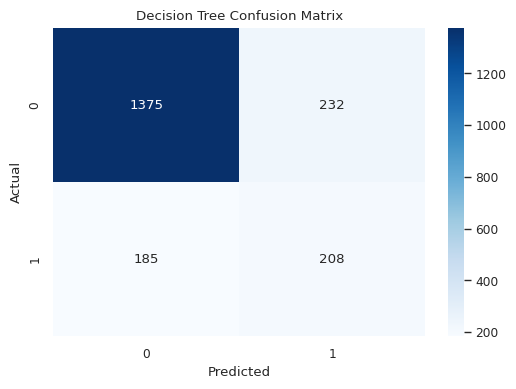

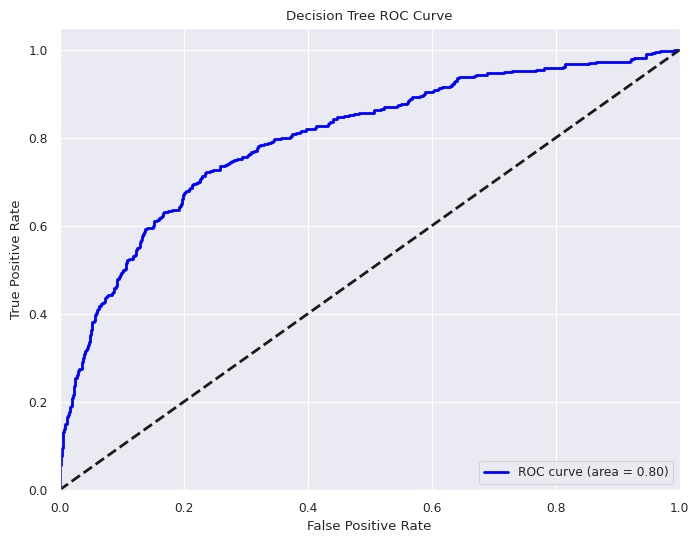

Training Random Forest...


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Random Forest Classification Report:
               precision    recall  f1-score   support

           0     0.8805    0.9670    0.9217      1607
           1     0.7745    0.4631    0.5796       393

    accuracy                         0.8680      2000
   macro avg     0.8275    0.7151    0.7507      2000
weighted avg     0.8596    0.8680    0.8545      2000

Random Forest Confusion Matrix:
 [[1554   53]
 [ 211  182]]


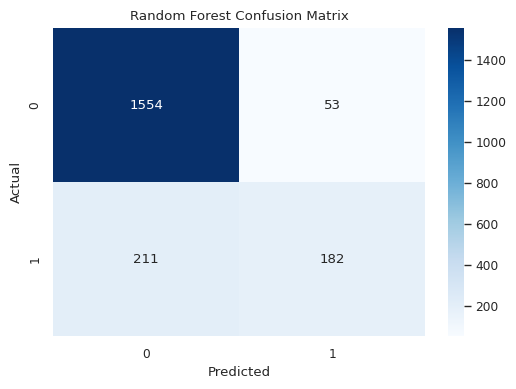

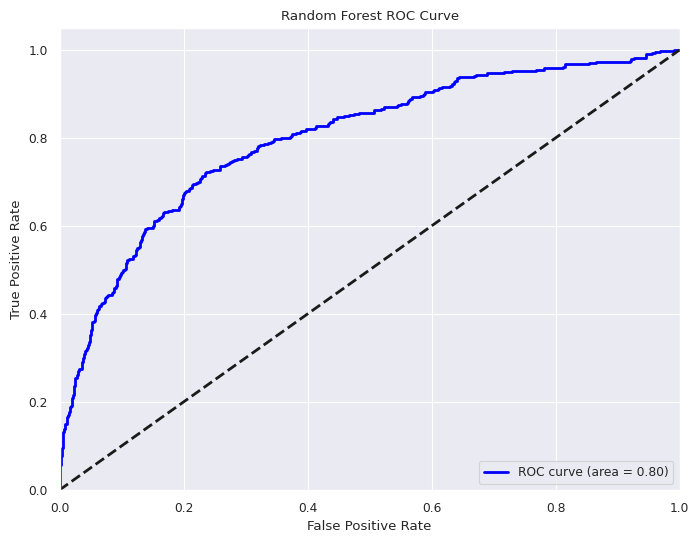

Training Extra Trees...

Extra Trees Classification Report:
               precision    recall  f1-score   support

           0     0.8785    0.9627    0.9186      1607
           1     0.7490    0.4555    0.5665       393

    accuracy                         0.8630      2000
   macro avg     0.8137    0.7091    0.7426      2000
weighted avg     0.8530    0.8630    0.8494      2000

Extra Trees Confusion Matrix:
 [[1547   60]
 [ 214  179]]


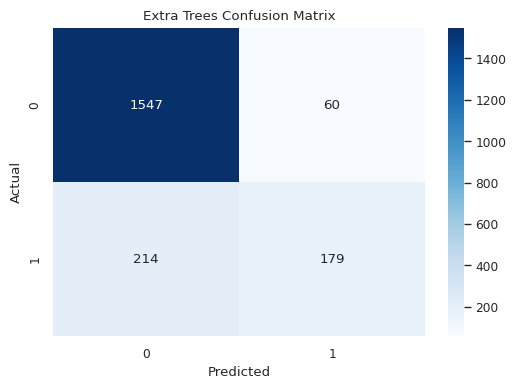

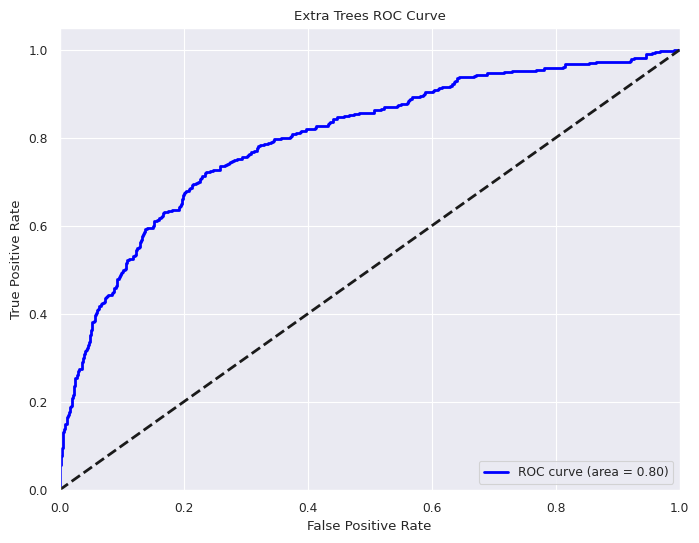

Training SVM...

SVM Classification Report:
               precision    recall  f1-score   support

           0     0.8551    0.9770    0.9120      1607
           1     0.7744    0.3232    0.4560       393

    accuracy                         0.8485      2000
   macro avg     0.8148    0.6501    0.6840      2000
weighted avg     0.8393    0.8485    0.8224      2000

SVM Confusion Matrix:
 [[1570   37]
 [ 266  127]]


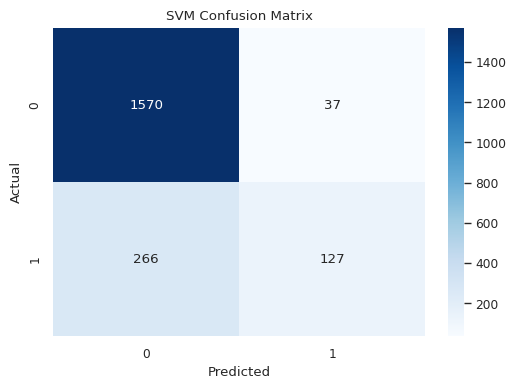

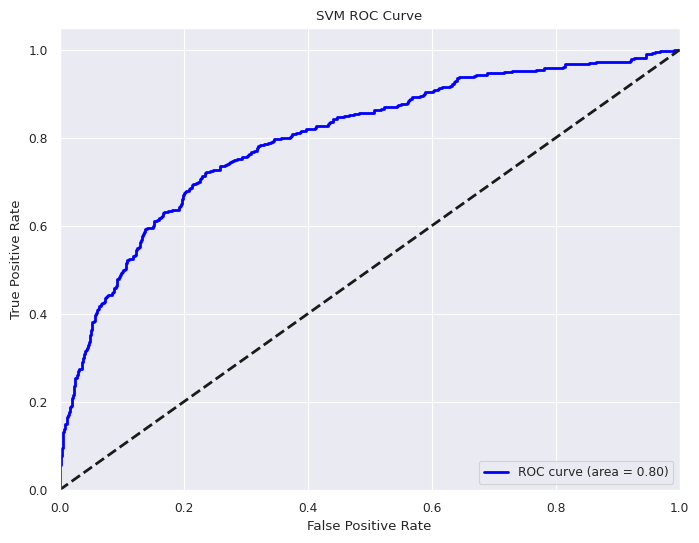

Training Logistic Regression...

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0     0.8510    0.9633    0.9037      1607
           1     0.6740    0.3104    0.4251       393

    accuracy                         0.8350      2000
   macro avg     0.7625    0.6369    0.6644      2000
weighted avg     0.8162    0.8350    0.8096      2000

Logistic Regression Confusion Matrix:
 [[1548   59]
 [ 271  122]]


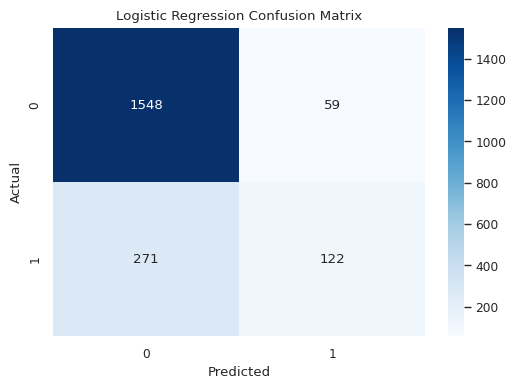

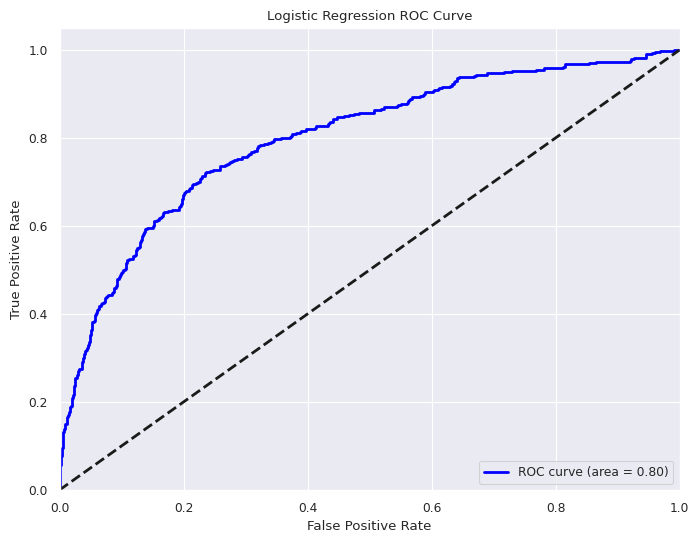

Training KNN...

KNN Classification Report:
               precision    recall  f1-score   support

           0     0.8565    0.9359    0.8944      1607
           1     0.5779    0.3588    0.4427       393

    accuracy                         0.8225      2000
   macro avg     0.7172    0.6473    0.6686      2000
weighted avg     0.8017    0.8225    0.8057      2000

KNN Confusion Matrix:
 [[1504  103]
 [ 252  141]]


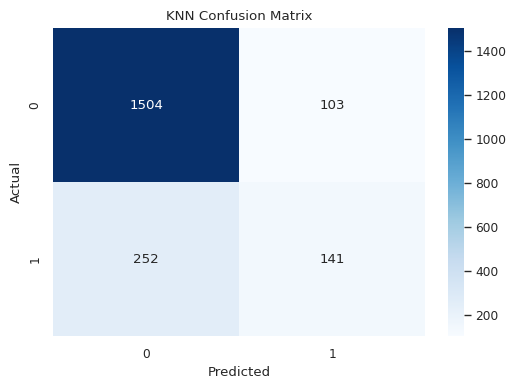

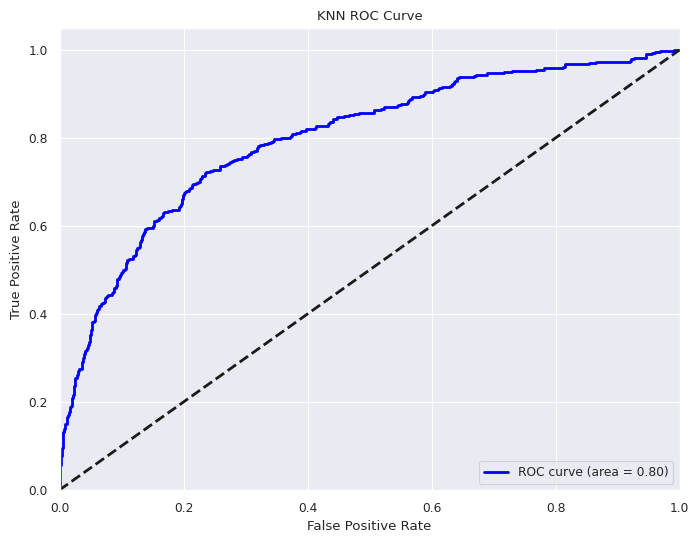

Training MLP...

MLP Classification Report:
               precision    recall  f1-score   support

           0     0.8902    0.9540    0.9210      1607
           1     0.7338    0.5191    0.6080       393

    accuracy                         0.8685      2000
   macro avg     0.8120    0.7365    0.7645      2000
weighted avg     0.8595    0.8685    0.8595      2000

MLP Confusion Matrix:
 [[1533   74]
 [ 189  204]]


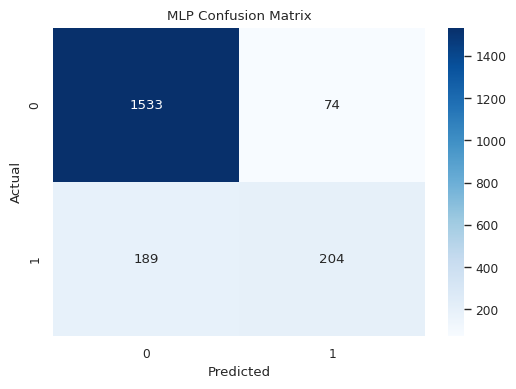

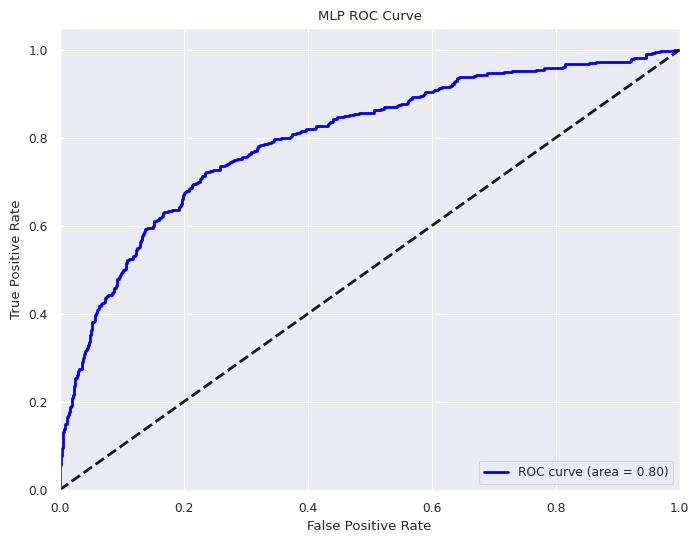

Training SGD...

SGD Classification Report:
               precision    recall  f1-score   support

           0     0.8107    0.9994    0.8952      1607
           1     0.9474    0.0458    0.0874       393

    accuracy                         0.8120      2000
   macro avg     0.8790    0.5226    0.4913      2000
weighted avg     0.8376    0.8120    0.7365      2000

SGD Confusion Matrix:
 [[1606    1]
 [ 375   18]]


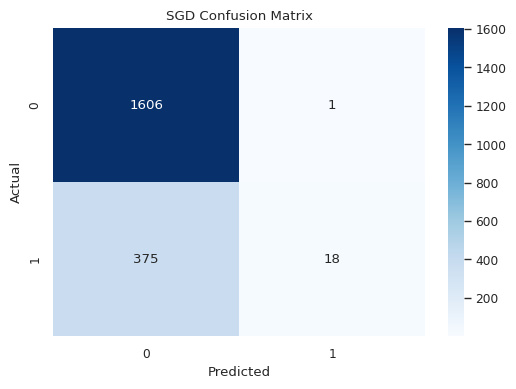

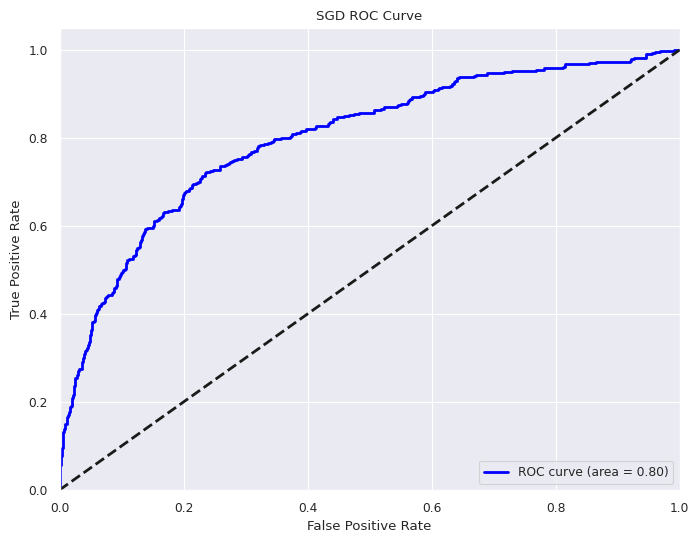

Training AdaBoost...

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0     0.8812    0.9459    0.9124      1607
           1     0.6836    0.4784    0.5629       393

    accuracy                         0.8540      2000
   macro avg     0.7824    0.7121    0.7376      2000
weighted avg     0.8423    0.8540    0.8437      2000

AdaBoost Confusion Matrix:
 [[1520   87]
 [ 205  188]]


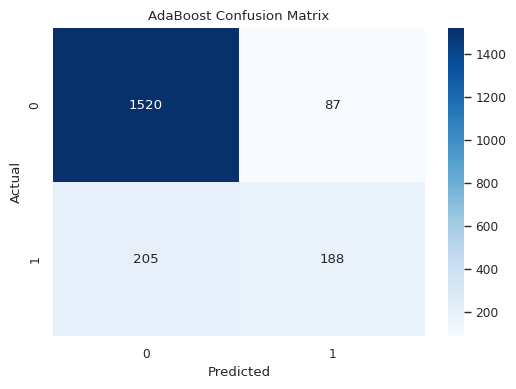

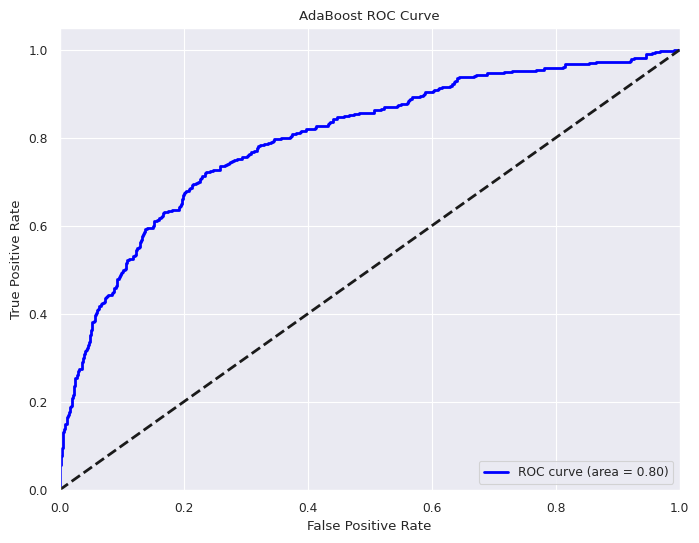

Training XGBoost...

XGBoost Classification Report:
               precision    recall  f1-score   support

           0     0.8913    0.9440    0.9169      1607
           1     0.6980    0.5293    0.6020       393

    accuracy                         0.8625      2000
   macro avg     0.7946    0.7366    0.7595      2000
weighted avg     0.8533    0.8625    0.8550      2000

XGBoost Confusion Matrix:
 [[1517   90]
 [ 185  208]]


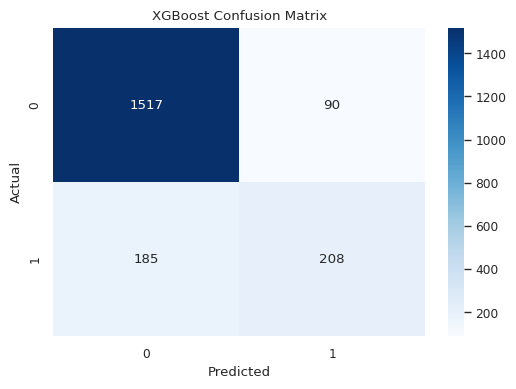

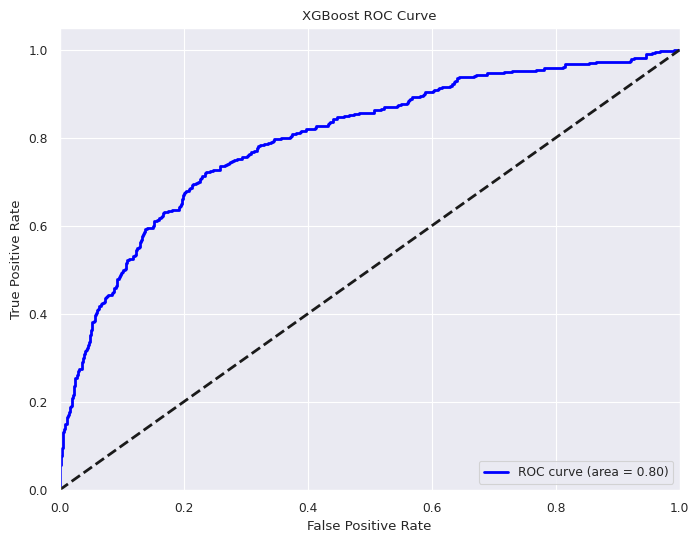

Training Gradient Boosting...

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0     0.8832    0.9602    0.9201      1607
           1     0.7470    0.4809    0.5851       393

    accuracy                         0.8660      2000
   macro avg     0.8151    0.7205    0.7526      2000
weighted avg     0.8565    0.8660    0.8543      2000

Gradient Boosting Confusion Matrix:
 [[1543   64]
 [ 204  189]]


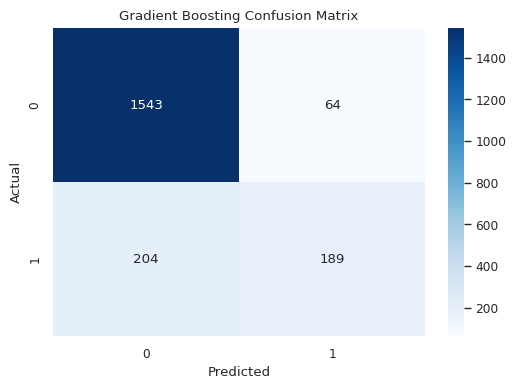

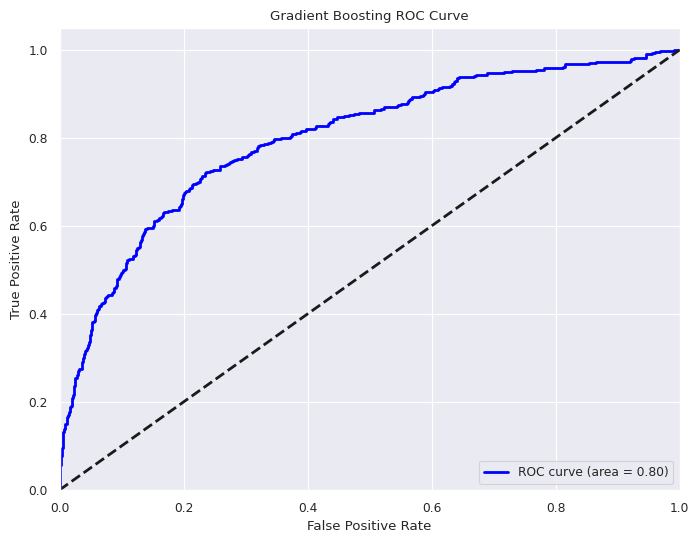

Training LightGBM...
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267

LightGBM Classification Report:
               precision    recall  f1-score   support

           0     0.8849    0.9620    0.9219      1607
           1     0.7589    0.4885    0.5944       393

    accuracy                         0.8690      2000
   macro avg     0.8219    0.7253    0.7582      2000
weighted avg     0.8602    0.8690    0.8575      2000

LightGBM Confusion Matrix:
 [[1546   61]
 [ 201  192]]


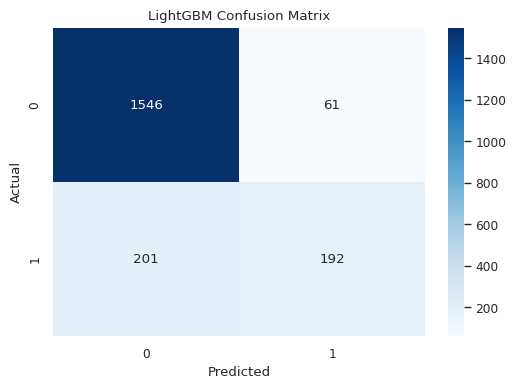

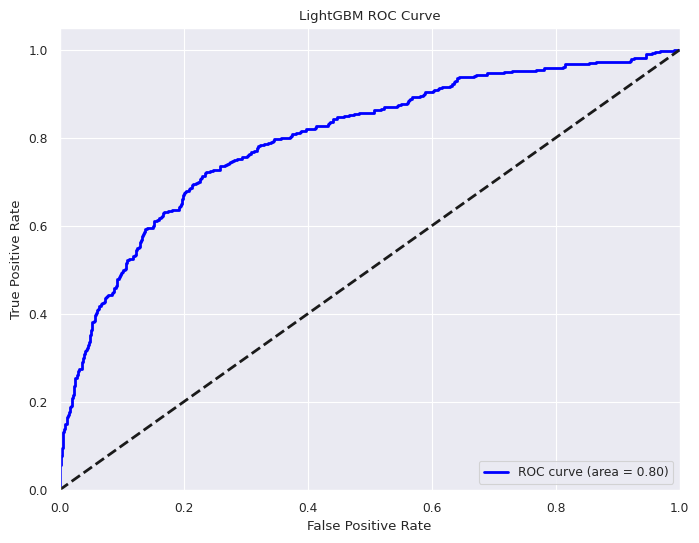

In [112]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Initialize results dictionary
results = {}

# Get unique classes
classes = np.unique(y_test)

# Binarize only for multiclass classification
if len(classes) > 2:
    y_test_bin = label_binarize(y_test, classes=classes)
else:
    y_test_bin = y_test  # No need to binarize for binary classification

# Loop through models, fit, predict and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report and confusion matrix
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if len(classes) > 2:
        # Multiclass ROC
        fpr, tpr, roc_auc = {}, {}, {}
        for i, cls in enumerate(classes):
            fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[cls] = auc(fpr[cls], tpr[cls])
    else:
        # Binary ROC Curve - Fix single column issue
        if y_proba.ndim == 1:  
            fpr, tpr, _ = roc_curve(y_test, y_proba)  # Directly use y_proba
        else:
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Use second column (positive class)
        
        roc_auc = auc(fpr, tpr)
    
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()



Model Accuracies:

                  Model  Accuracy
11             LightGBM    0.8690
6                   MLP    0.8685
1         Random Forest    0.8680
10    Gradient Boosting    0.8660
2           Extra Trees    0.8630
9               XGBoost    0.8625
8              AdaBoost    0.8540
3                   SVM    0.8485
4   Logistic Regression    0.8350
5                   KNN    0.8225
7                   SGD    0.8120
0         Decision Tree    0.7915


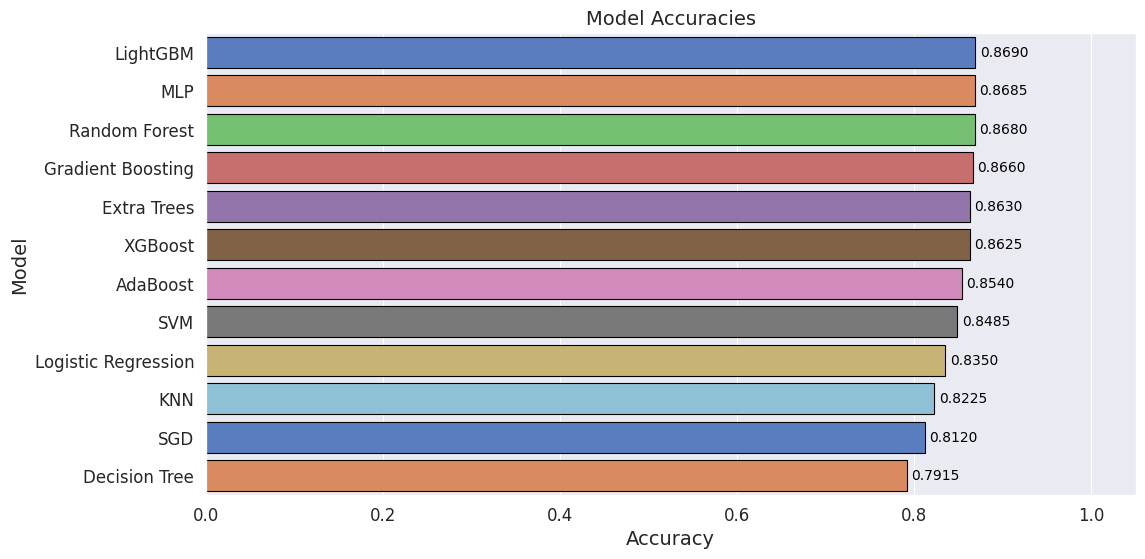

In [113]:
# Create a DataFrame of results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Print the results table
print("\nModel Accuracies:\n")
print(results_df)


# Enhanced Accuracy Bar Plot with customized ticks and color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='muted', edgecolor='black')

# Adding values on the bars for better readability
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 0.005, index, f'{value:.4f}', va='center', fontsize=10, color='black')

# Title and Labels
plt.title('Model Accuracies', fontsize=14)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Customizing tick fonts and x-axis increments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting x-axis range to end at 1
plt.xlim(0, 1.05)

# Display the plot
plt.show()